In [ ]:
!pip install matplotlib numpy basemap
!pip install geopandas pysal pandas
!pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 57.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import geopandas as gpd
from pysal.model import mgwr
from pysal.lib import weights
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.ndimage import gaussian_filter
from sklearn.linear_model import LinearRegression


In [ ]:
with open('filtered_meta-California.json', 'r') as file:
    filtered_data = json.load(file)


In [ ]:
min_latitude = 32.5442  # Southernmost point
max_latitude = 41.4385  # Northernmost point
min_longitude = -124.4095  # Westernmost point
max_longitude = -114.1312  # Easternmost point

#Remove incorrect samples outside of California
filtered_data = [business for business in filtered_data if
                 min_latitude <= business.get('latitude', 0) <= max_latitude and
                 min_longitude <= business.get('longitude', 0) <= max_longitude]


In [ ]:
category_ratings_sum = {}
category_business_count = {}
one_hot_category = {}
category_num_reviews = {}
countCat = 0

for business in filtered_data:
    categories = business.get("category")
    avg_rating = business.get("avg_rating")
    num_reviews = business.get("num_of_reviews")

    if categories is not None and avg_rating is not None and num_reviews is not None:
        for category in categories:
            if category not in category_ratings_sum:
                category_ratings_sum[category] = 0
                category_business_count[category] = 0
                category_num_reviews[category] = 0
                one_hot_category[category] = countCat
                countCat += 1

            category_ratings_sum[category] += avg_rating
            category_business_count[category] += 1
            category_num_reviews[category] += num_reviews

category_avg_rating = {}
for category in category_ratings_sum:
    category_avg_rating[category] = category_ratings_sum[category] / category_business_count[category]

print(category_num_reviews)


{'Textile exporter': 70, 'Korean restaurant': 225669, 'Fabric store': 136739, 'Ski rental service': 23616, 'Snowboard rental service': 19760, 'Massage spa': 98627, 'Chiropractor': 74842, 'Massage': 2190, 'Massage therapist': 134377, 'Medical clinic': 154044, 'Paint store': 360640, 'Paint manufacturer': 10746, 'Corporate office': 138261, 'Spa': 157727, 'Bus stop': 10304, 'Engineering consultant': 1920, 'Architecture firm': 202, 'Civil engineering company': 108, 'Construction company': 14816, 'Environmental engineer': 260, 'Door supplier': 28234, 'Auto parts store': 851164, 'Auto repair shop': 1226662, 'Thai massage therapist': 12999, 'Financial audit': 226, 'Church': 143196, 'Elementary school': 10455, 'Beauty salon': 447496, 'Brewery': 271273, 'Tire shop': 672286, 'Office space rental agency': 11435, 'Business center': 154091, 'Coworking space': 17638, 'Virtual office rental': 3192, 'Repair service': 45537, 'Exercise equipment store': 27593, 'Hair salon': 354580, 'Nail salon': 367965, 

In [ ]:
print(category_num_reviews['Restaurant'])

13697437


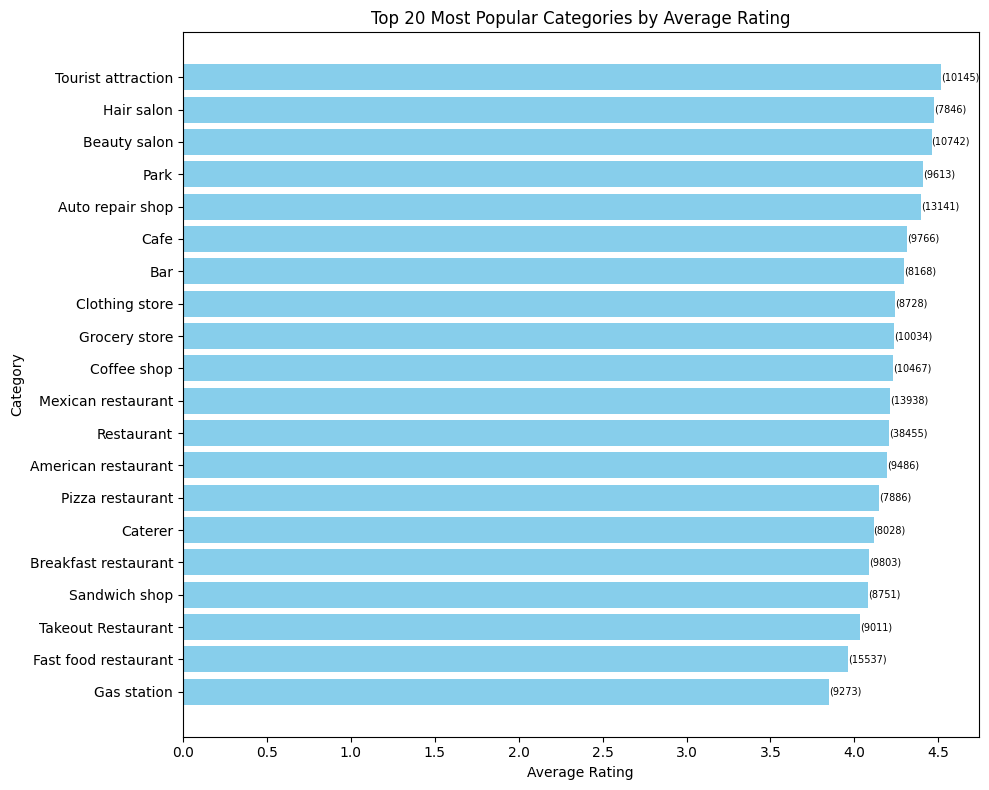

In [ ]:

sorted_categories_by_count = sorted(category_business_count.items(), key=lambda x: x[1], reverse=True)[:20]

sorted_categories_by_avg_rating = sorted(sorted_categories_by_count, key=lambda x: category_avg_rating[x[0]], reverse=True)

top_categories = [category for category, _ in sorted_categories_by_avg_rating]
top_categories_ratings = [category_avg_rating[category] for category in top_categories]


top_categories_counts = [category_business_count[category] for category in top_categories]

plt.figure(figsize=(10,8))
bars = plt.barh(top_categories, top_categories_ratings, color='skyblue')

for bar, count in zip(bars, top_categories_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'({count})',
             va='center', ha='left', fontsize=7)

plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Top 20 Most Popular Categories by Average Rating')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('top_categories_ratings_chart.png')
plt.show()





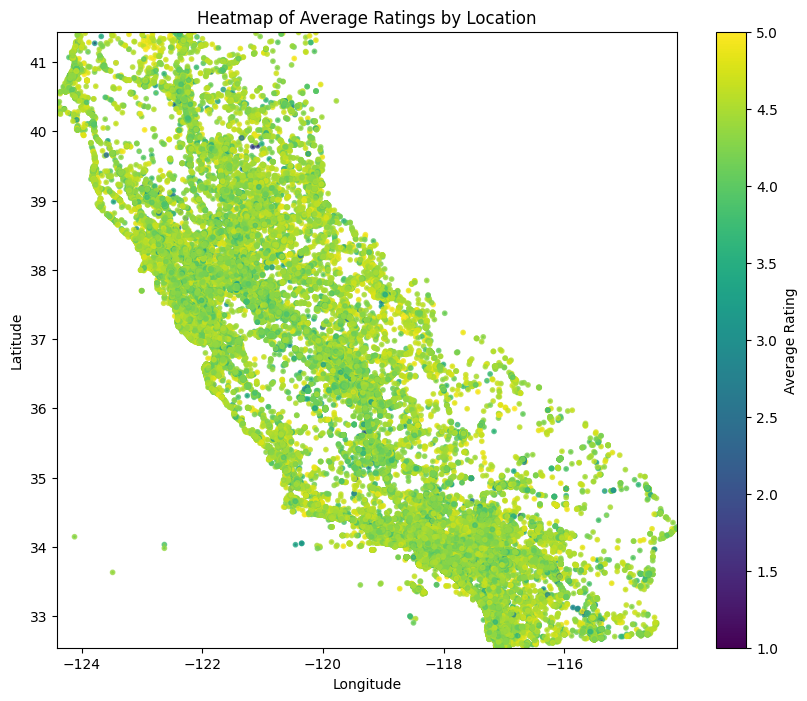

In [ ]:

lats = [business['latitude'] for business in filtered_data if business.get('latitude')]
longs = [business['longitude'] for business in filtered_data if business.get('longitude')]
ratings = [business['avg_rating'] for business in filtered_data if business.get('avg_rating')]

plt.figure(figsize=(10, 8))
plt.scatter(longs, lats, c=ratings, cmap='viridis', s=1)

plt.colorbar(label='Average Rating')


plt.xlim(min_longitude, max_longitude)
plt.ylim(min_latitude, max_latitude)

ratings_array = np.array(ratings)
smoothed_ratings = gaussian_filter(ratings_array, sigma=1)

plt.scatter(longs, lats, c=smoothed_ratings, cmap='viridis', s=10, alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Average Ratings by Location')
plt.savefig('heatmap_ratings.png')
plt.show()



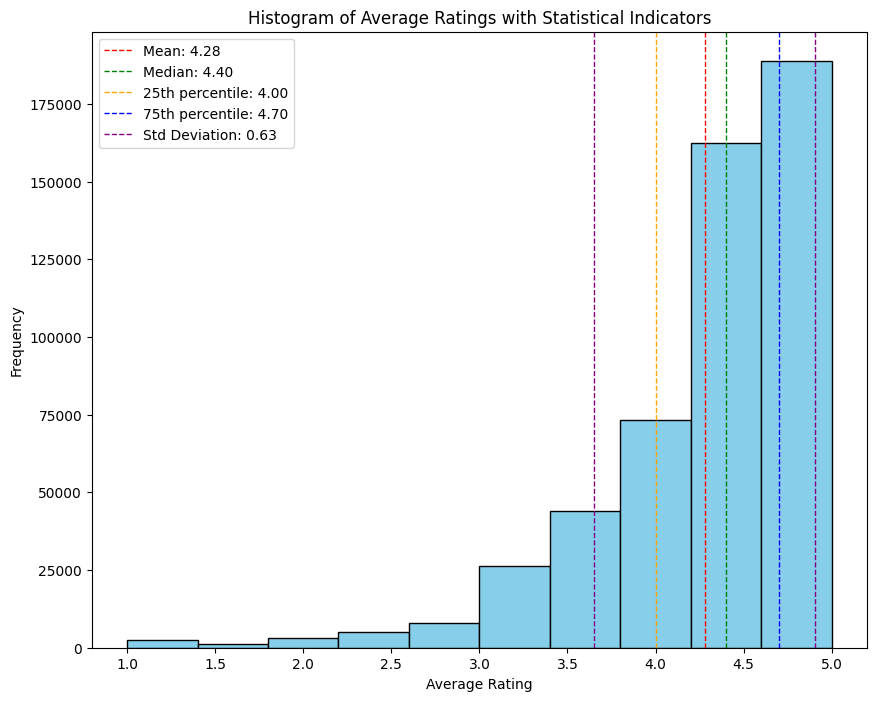

In [ ]:
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
percentile_25 = np.percentile(ratings, 25)
percentile_75 = np.percentile(ratings, 75)
std_deviation = np.std(ratings)

plt.figure(figsize=(10, 8))
hist = plt.hist(ratings, bins=10, color='skyblue', edgecolor='black')
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_rating:.2f}')
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=1, label=f'25th percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color='blue', linestyle='dashed', linewidth=1, label=f'75th percentile: {percentile_75:.2f}')
plt.axvline(mean_rating + std_deviation, color='purple', linestyle='dashed', linewidth=1, label=f'Std Deviation: {std_deviation:.2f}')
plt.axvline(mean_rating - std_deviation, color='purple', linestyle='dashed', linewidth=1)

plt.legend()

plt.title('Histogram of Average Ratings with Statistical Indicators')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.savefig('histogram_ratings.png')
plt.show()

In [ ]:
random.shuffle(filtered_data)
split_index = int(len(filtered_data) * 0.8)
dataTrain = filtered_data[:split_index]
dataTest = filtered_data[split_index:]

In [ ]:


num_bins_lat = 1000
num_bins_long = 1000

lat_bins = np.linspace(min_latitude, max_latitude, num_bins_lat + 1)
long_bins = np.linspace(min_longitude, max_longitude, num_bins_long + 1)

def find_bin(value, bins):
    for i in range(len(bins) - 1):
        if bins[i] <= value < bins[i + 1]:
            return i
    return len(bins) - 2

bin_ratings = {}
for business in dataTrain:
    if 'latitude' in business and 'longitude' in business and 'avg_rating' in business:
        lat_bin = find_bin(business['latitude'], lat_bins)
        long_bin = find_bin(business['longitude'], long_bins)
        bin_index = (lat_bin, long_bin)

        if bin_index not in bin_ratings:
            bin_ratings[bin_index] = []

        bin_ratings[bin_index].append(business['avg_rating'])
average_ratings_by_bin = {bin_index: sum(ratings) / len(ratings) for bin_index, ratings in bin_ratings.items()}




In [ ]:
dataTrain[0]

{'name': 'Dr. Hafid Ortega',
 'address': 'Dr. Hafid Ortega, 14501 S Bascom Ave Suite G, Los Gatos, CA 95032',
 'latitude': 37.2578726,
 'longitude': -121.9489814,
 'category': ['Cosmetic dentist'],
 'avg_rating': 5,
 'num_of_reviews': 2}

In [ ]:
predicted_ratings = []
actual_ratings = []

global_avg = 4.28

for business in dataTest:
    if 'latitude' in business and 'longitude' in business and 'avg_rating' in business:
        predicted_rating = global_avg

        lat_bin = find_bin(business['latitude'], lat_bins)
        long_bin = find_bin(business['longitude'], long_bins)
        bin_index = (lat_bin, long_bin)

        bin_avg = average_ratings_by_bin.get(bin_index)
        category = business['category'][0] if 'category' in business and business['category'] else None
        cat_avg = category_avg_rating.get(category) if category else None
        if bin_avg is not None and cat_avg is not None:
            predicted_rating = (bin_avg + cat_avg) / 2
        elif bin_avg is not None:
            predicted_rating = bin_avg
        elif cat_avg is not None:
            predicted_rating = cat_avg



        predicted_ratings.append(global_avg if cat_avg is None else cat_avg)
        actual_ratings.append(business['avg_rating'])

mse = sum((p - a) ** 2 for p, a in zip(predicted_ratings, actual_ratings)) / len(predicted_ratings)
mse


0.3168462182284863

In [ ]:

latitudes = [business.get('latitude') for business in dataTrain]
longitudes = [business.get('longitude') for business in dataTrain]
ratings = [business.get('avg_rating') for business in dataTrain]
num_reviews_cat = [category_num_reviews[business.get('category')[0]] if business.get('category') else 0 for business in dataTrain]
categories_avg = [category_avg_rating[business.get('category')[0]] if business.get('category') else global_avg for business in dataTrain]

df = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'rating': ratings,
    'category_avg':categories_avg,
    'num_reviews': num_reviews_cat
})

X = df[['latitude', 'longitude', 'category_avg']]  # Features
y = df['rating']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')




MSE: 0.32049746100710064


In [ ]:

df['log_num_reviews'] = np.log1p(df['num_reviews'])
X = df[['latitude', 'longitude', 'category_avg', 'log_num_reviews']]
y = df['rating']
alpha = 10
df['weighted_category_avg'] = (
    (df['category_avg'] * df['num_reviews']) + (global_avg * alpha)
) / (df['num_reviews'] + alpha)

X = df[['latitude', 'longitude', 'weighted_category_avg', 'log_num_reviews']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=100)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


MSE: 0.3103289713747646


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance']}

knn = KNeighborsRegressor(n_neighbors=100)

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f'Best parameters found: {best_params}')


Best parameters found: {'metric': 'manhattan', 'weights': 'uniform'}


In [ ]:
knn = KNeighborsRegressor(n_neighbors=100, weights='uniform', metric='chebyshev')

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE optimized: {mse}')


MSE optimized: 0.31078274980863857
